In [1]:
from gensim.models.fasttext import FastText
from gensim.scripts.word2vec2tensor import word2vec2tensor

In [2]:
model = FastText.load('model.bin')

In [3]:
# Taken from: https://www.kdnuggets.com/2018/04/robust-word2vec-models-gensim.html
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [4]:
keywords = ['orange', 'heart', 'ebola', 'flu', 'smoke', 'diabetes']

In [5]:
similar_words = {search_term: [item[0] for item in model.wv.most_similar([search_term], topn = 5)]
                  for search_term in keywords}

/mnt/Data/Miniconda3/envs/myenv/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


In [6]:
print(similar_words)

{'orange': ['range', 'lange', 'granger', 'strange', 'pineapple'], 'heart': ['hearty', 'hearts', 'heartbeat', 'heartmonth', 'heartburn'], 'ebola': ['ebolaqanda', 'ebolafacts', 'ebolaoutbreak', 'meningitis', 'cola'], 'flu': ['fluid', 'flush', 'tamiflu', 'fl', 'fluoride'], 'smoke': ['smoker', 'smoked', 'smog', 'smokes', 'smokers'], 'diabetes': ['prediabetes', 'diabetic', 'diabetics', 'dementia', 'diarrhea']}


In [7]:
words = sum([[k] + v for k, v in similar_words.items()], [])
wvs = model.wv[words]

In [10]:
print(wvs)

[[-0.15974335  0.37713882 -0.00554807 ... -0.58939993 -0.07937849
  -0.00139467]
 [-0.74841255  0.4540402   0.13459621 ... -0.6226906  -0.23813938
   0.05058939]
 [-0.56693417  0.49475765  0.58787745 ... -0.63513273  0.22128099
   0.4755845 ]
 ...
 [ 0.08190983 -1.0056959   0.10092922 ... -0.51914567 -0.00791061
   0.15421997]
 [ 0.4122951  -0.428244    0.72718936 ... -0.17837664  0.2399087
   0.13420834]
 [-0.23482597 -0.18991081  0.22693112 ... -0.1155424  -0.26605162
   0.2718597 ]]


In [8]:
tsne = TSNE(n_components = 2, random_state = 0, n_iter = 10000, perplexity = 2)
np.set_printoptions(suppress = True)
T = tsne.fit_transform(wvs)
labels = words

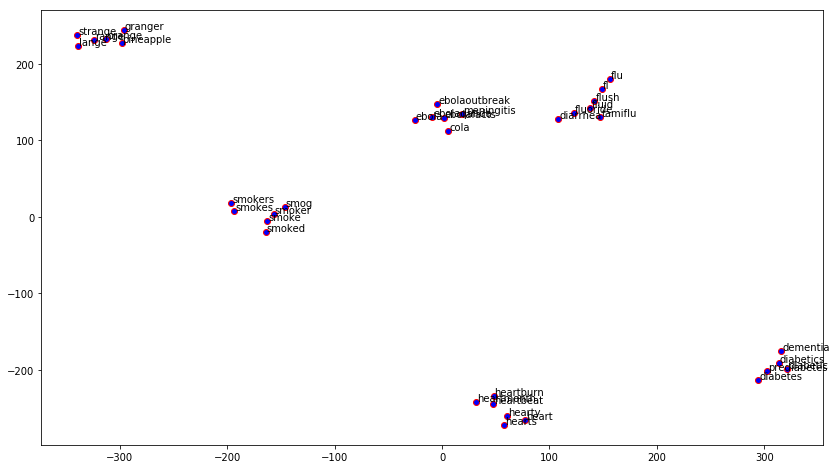

In [9]:
plt.figure(figsize = (14, 8))
plt.scatter(T[:, 0], T[:, 1], c = 'blue', edgecolors = 'r')
for label, x, y in zip(labels, T[:, 0], T[:, 1]):
  plt.annotate(label, xy = (x + 1, y + 1), xytext = (0, 0), textcoords = 'offset points')
plt.show()